<a href="https://colab.research.google.com/github/Jalen18/Midterm-Exam/blob/main/Lacambra_LinAlg_Midterms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>Lacambra, Jalen Rhey A.<br>
    201912014 <br>
   58051 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

State and explain Bebang's problem here and provide the deliverables.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [8]:
import pandas as pd

file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)


## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [9]:
## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [10]:
import numpy as np
### Vectorizing the data

sales_mat = np.array(df_sales.set_index('flavor'))
A = np.array(df_prices)[:1] ## reshape this vector to the appropriate size
B = np.array(df_prices)[1:] ## reshape this vector to the appropriate size
prices_mat = np.transpose(A)
costs_mat = np.transpose(B)


## Do not alter these lines
print(sales_mat.shape)
print(prices_mat.shape)
print(costs_mat.shape)
# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)

(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [11]:
#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
    monthly_revenue = sales * price
    monthly_costs = sales * cost
    monthly_profits = monthly_revenue - monthly_costs  

    monthlyprofit = monthly_profits.transpose()
    monthprofit = monthlyprofit.sum(axis = 1)

    df_profit = pd.DataFrame(monthprofit)
    df_profit.columns = ["Monthly Profits"]
    df_profit.index = ["January","February",
                       "March","April","May",
                       "June","July","August",
                       "September","October",
                       "November","December"]
    print(df_profit)

    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()

In [15]:
### Do not alter this cell
monthly_revenue, monthly_cost, monthly_profit = monthly_sales(prices_mat, costs_mat, sales_mat)
### print the values
print("="*80)
print("Revenues\n",monthly_revenue)
print("="*80)
print("Costs\n", monthly_cost)
print("="*80)
print("Profits\n" ,monthly_profit)

           Monthly Profits
January              79371
February             59208
March                53850
April                10001
May                  52824
June                  5527
July                  5598
August                5498
September             5034
October               7213
November             76548
December            117156
Revenues
 [ 27335  18340  12740   5495  31290   1960   3115   1435    805   2730
   8085  31465   5250   8100   8600    800   3075     25     75      0
     25    150   7800  13700  11980  13480  17080    280   9340   1560
    720    960   1500   1960  15620  32040   4340   3920   3990    805
   6930    420   1120   1435    805   1260  10500  19810  32250  24900
  44250   4900   8850   4900   2150   4800   1300   3550  27450  44850
   8400  14880  14760   3120   6520   1040   1800    880   2160   1640
   8280  18240  39240  15200   6160    560   5880    600   3920   1320
    920   1440  22080  25320  21510  20790  15930   2205   4005      0


## Part 2: Flavor Sales

In [ ]:
#Create a function that *returns* and prints the flavor profits for the whole year 
A = []
def flavor_sales(price, cost, sales):
    flavor_revenue = sales * price
    flavor_costs = sales * cost
    flavor_profits = flavor_revenue - flavor_costs

    RedVelvet = flavor_profits[0].sum()
    A.append(RedVelvet)

    Oreo = flavor_profits[1].sum()
    A.append(Oreo)

    SugarGlazed = flavor_profits[2].sum()
    A.append(SugarGlazed)

    AlmondHoney = flavor_profits[3].sum()
    A.append(AlmondHoney)

    Matcha =  flavor_profits[4].sum()
    A.append(Matcha)

    StrawberryCream =  flavor_profits[5].sum()
    A.append(StrawberryCream)

    BrownSugarBoba =  flavor_profits[6].sum()
    A.append(BrownSugarBoba)

    FuritsAndNuts =  flavor_profits[7].sum()
    A.append(FuritsAndNuts)

    DarkChocolate =  flavor_profits[8].sum()
    A.append(DarkChocolate)

    ChocolateAndOrange =  flavor_profits[9].sum()
    A.append(ChocolateAndOrange)

    ChocoMint =  flavor_profits[10].sum()
    A.append(ChocoMint)

    ChocoButterNaught =  flavor_profits[11].sum()
    A.append(ChocoButterNaught)

    df_flavors = pd.DataFrame(A)
    df_flavors.columns = ["Yearly Profit"]
    df_flavors.index = ["RedVelvet","Oreo",
                        "SugarGlazed","AlmondHoney",
                        "Matcha","StrawberryCream","BrownSugarBoba",
                        "FuritsAndNuts"," DarkChocolate","ChocolateAndOrange",
                        "ChocoMint","ChocoButterNaught"]

    print(df_flavors)

    return flavor_profits.flatten()



In [ ]:
### Do not alter this cell
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)
### print the values
print("="*80)
print("Profit\n",flavor_profit)

                    Yearly Profit
RedVelvet                   41370
Oreo                        19040
SugarGlazed                 53260
AlmondHoney                 23715
Matcha                      61245
StrawberryCream             18387
BrownSugarBoba              30660
FuritsAndNuts               39820
 DarkChocolate              44790
ChocolateAndOrange          27615
ChocoMint                   26156
ChocoButterNaught           91770
Profit
 [ 7810  5240  3640  1570  8940   560   890   410   230   780  2310  8990
  2100  3240  3440   320  1230    10    30     0    10    60  3120  5480
  5990  6740  8540   140  4670   780   360   480   750   980  7810 16020
  1860  1680  1710   345  2970   180   480   615   345   540  4500  8490
  9675  7470 13275  1470  2655  1470   645  1440   390  1065  8235 13455
  1890  3348  3321   702  1467   234   405   198   486   369  1863  4104
  9810  3800  1540   140  1470   150   980   330   230   360  5520  6330
  9560  9240  7080   980  1780     0   

In [17]:
### identify the best-selling and least-selling flavors. You can use np.sort() or np.argmax() for this.
###best_3_flavors = ### YOUR CODE HERE
###worst_3_flavors = ### YOUR CODE HERE
df_sales["sum"] = df_sales.sum(axis = 1)
df_sales.sort_values("sum",axis=0, ascending=True, inplace=True, na_position='first')
print(df_sales)
best_3_flavors = [(df_sales.iloc[11]['flavor']),(df_sales.iloc[10]['flavor']),(df_sales.iloc[9]['flavor'])]
print("best-selling",best_3_flavors)
worst_3_flavors = [(df_sales.iloc[0]['flavor']),(df_sales.iloc[1]['flavor']),(df_sales.iloc[2]['flavor'])]
print("least-selling",worst_3_flavors)

                  flavor  january  february  ...  november  december    sum
3           almond honey      124       112  ...       300       566   3162
9   chocolate and orange      324       123  ...       632       231   3682
1                   oreo      210       324  ...       312       548   3808
7        furits and nuts      478       462  ...       335       214   3982
10            choco mint      458       412  ...       323       564   4024
5       strawberry cream      210       372  ...       207       456   4086
8         dark chocolate      598       203  ...       789       458   5972
6       brown sugar boba      981       380  ...       552       633   6132
4                 matcha      645       498  ...       549       897   8166
0             red velvet      781       524  ...       231       899   8274
2           sugar glazed      599       674  ...       781      1602  10652
11   choco butter naught      778       586  ...       784      2310  13110

[12 rows x 

## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [22]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline



#### Entire Dataset

#### Monthly Sales

AxesSubplot(0.125,0.125;0.775x0.755)


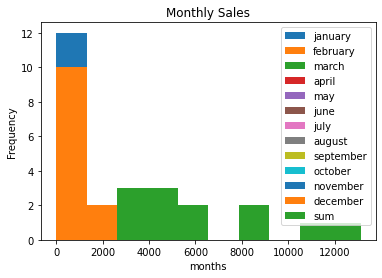

In [25]:
print(df_sales.plot('flavor',kind = 'hist'))
plt.title ('Monthly Sales')
plt.xlabel ('months')
plt.show()

#### Flavor Sales

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations



```
# This is formatted as code
```
After analyzing, inputting, and visualizing the use of graphs, therefore, I conclude that neither Aling Bebang's sales have been good throughout the year because it is only sessional or there is only a particular month with strong sales from December to February. As data analysis, I suggest selling other products in the unmentioned months to grow the business further.